1. Load and Explore the Dataset
2. Data Preprocessing
3. Build the Regression Model
4. Evaluate the Model

### 1. Load and Explore the Dataset

In [2]:
from sklearn.linear_model import LinearRegression  #used for regression and class
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'Student_Performance.csv'  
df = pd.read_csv(path)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.duplicated().sum()

np.int64(127)

In [6]:
df.drop_duplicates(inplace=True)
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [7]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
num_cols = df.select_dtypes(include="number").columns.tolist()
cat_cols = df.select_dtypes(exclude="number").columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)


Numerical: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']
Categorical: ['Extracurricular Activities']


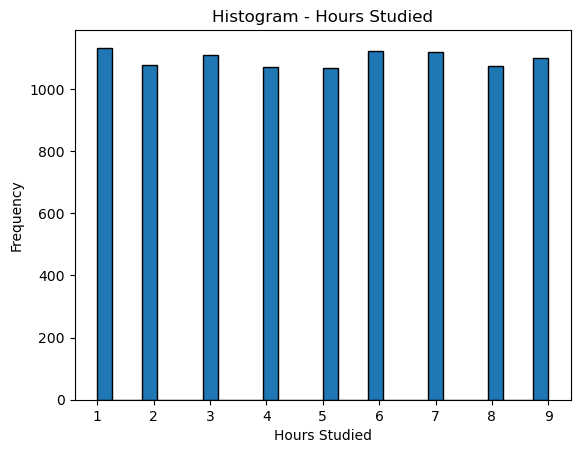

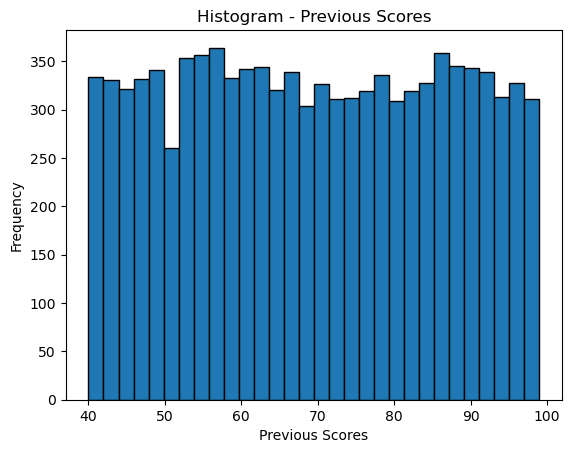

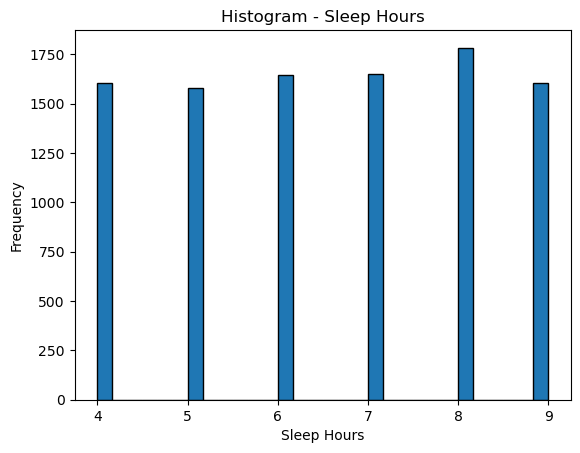

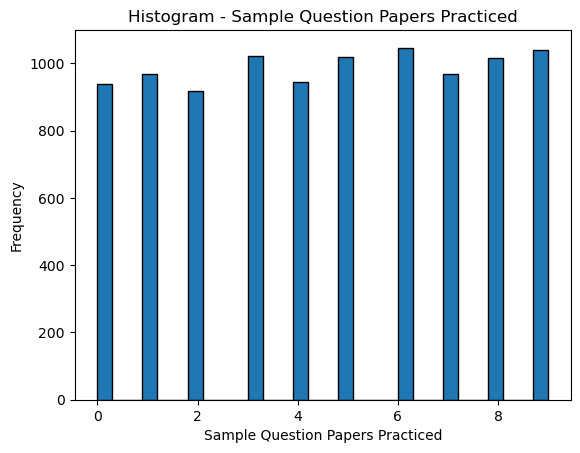

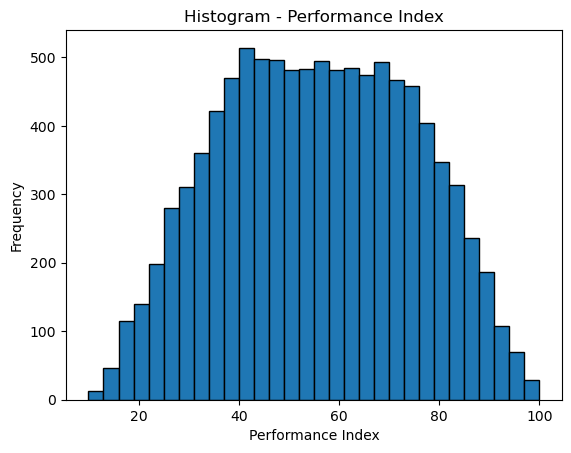

In [10]:
#histogram
for col in num_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=30, edgecolor='black')
    plt.title(f"Histogram - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

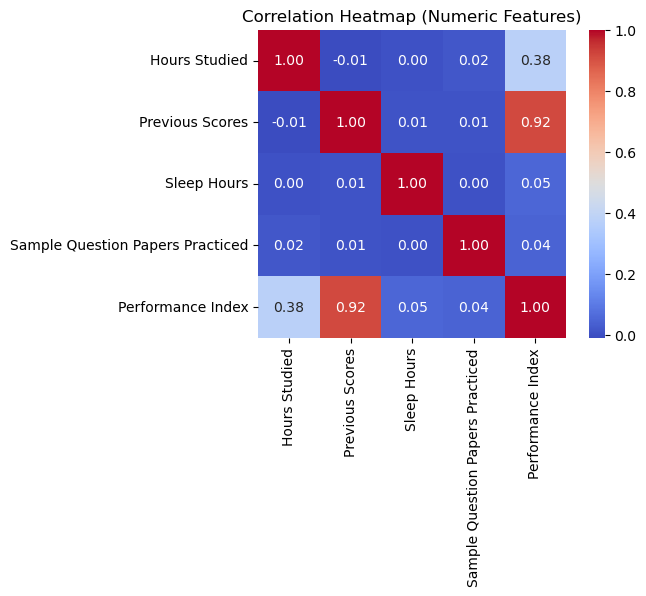

In [12]:
#correlation heatmap 
num_corr = df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(num_corr, cmap="coolwarm", annot=True, square=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


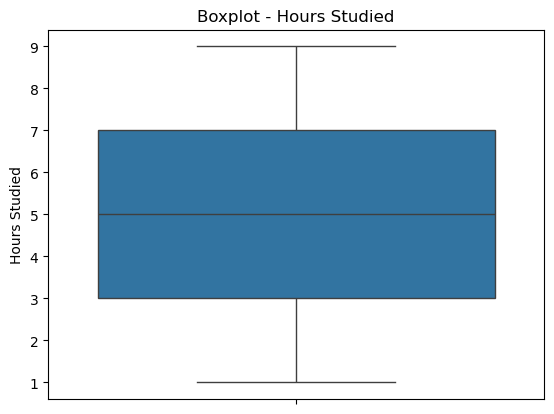

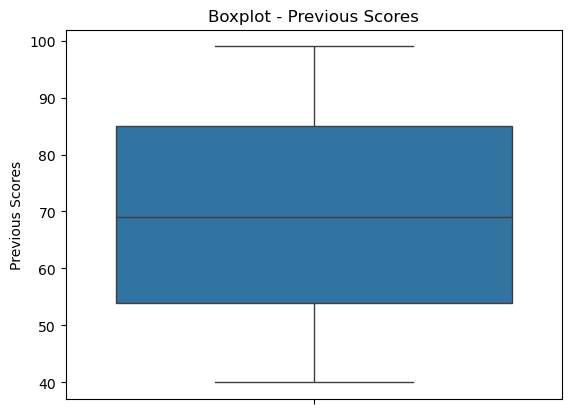

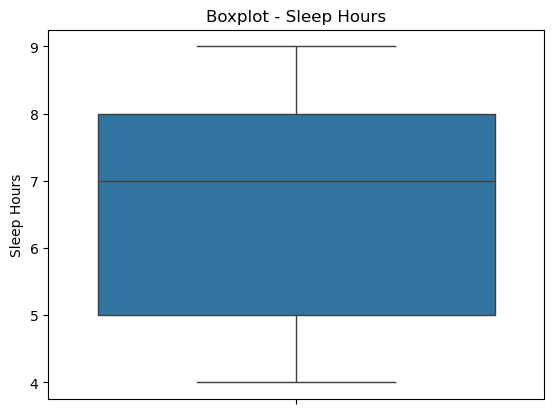

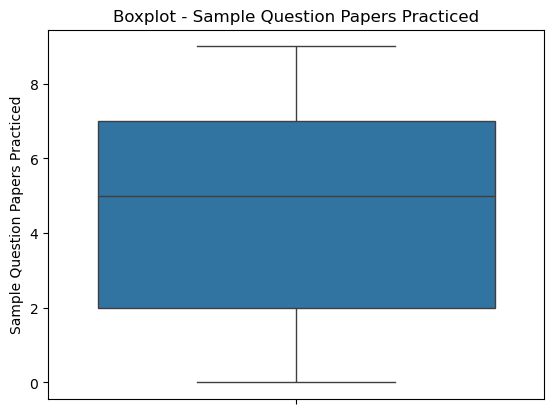

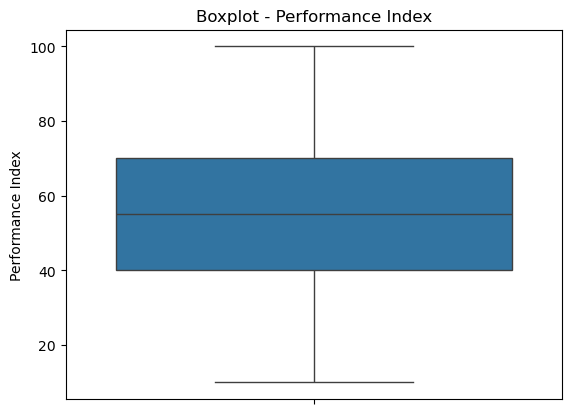

In [11]:
#boxplot loop
import seaborn as sns

for col in num_cols:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.show()


### 2. Data Preprocessing

In [14]:
target_col = "Performance Index"
X = df.loc[:, df.columns != target_col].copy()
Y = df[target_col].astype(float)
categorical_cols = X.select_dtypes(include="object").columns.to_list()
categorical_cols


['Extracurricular Activities']

In [16]:
encoded_df = pd.get_dummies(X, columns=cat_cols, drop_first=True, dtype=int)
print("Encoded shape:", encoded_df.shape)
encoded_df.head()


Encoded shape: (9873, 5)


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0


In [20]:
x_train, x_test, y_train, y_test = train_test_split(encoded_df, Y, test_size=0.2, random_state=42)


### 3. Build the Regression Model

In [21]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### 4. Evaluate the Model

In [23]:
y_hat = lr_model.predict(x_test)
mse_val = mean_squared_error(y_test, y_hat)
rmse_val = np.sqrt(mse_val)

print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("MSE: {:.2f}".format(mse_val))
print("R-squared: {:.2f}".format(r2_score(y_test, y_hat)))
print("Number of features:", lr_model.n_features_in_)
print("RMSE: {:.3f}".format(rmse_val))


Coefficients: [2.8510219  1.01843034 0.47207329 0.18870366 0.57382297]
Intercept: -33.98132449644058
MSE: 4.31
R-squared: 0.99
Number of features: 5
RMSE: 2.075


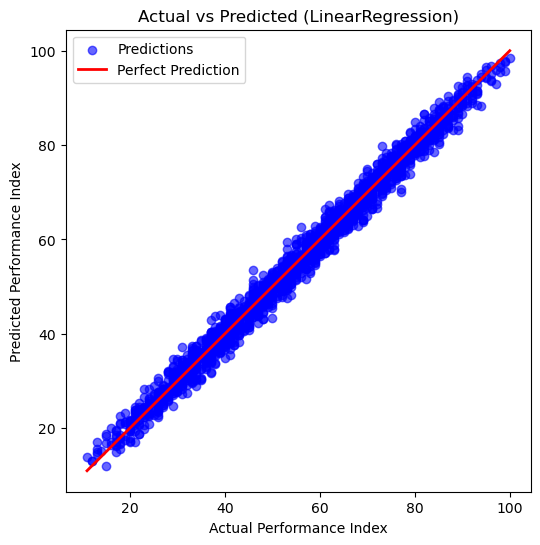

In [26]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_hat, alpha=0.6, c="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r-", lw=2, label="Perfect Prediction")

plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title(f"Actual vs Predicted ({type(lr_model).__name__})")
plt.legend()
plt.show()
